In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [6]:
os.chdir("/Users/eugenekim/PycharmProjects/aslAlphabetClassification")

In [7]:
from data.customDataset import ASLDataset

In [8]:
dataset = ASLDataset(csv_file = "data/aslDataset.csv", root_dir = "data/raw_data/asl_alphabet_complete", transform = transforms.ToTensor())

In [9]:
batch_size = 800
train_set, test_set = torch.utils.data.random_split(dataset, [2000, 500])
train_loader = DataLoader(dataset=train_set, batch_size = batch_size, shuffle = True)

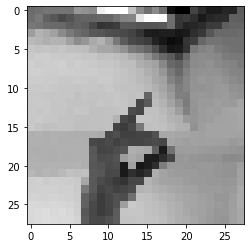

In [21]:
for inp,out in train_loader:
    plt.imshow(inp[0].reshape(28,28),cmap='gray')
    break